<a href="https://colab.research.google.com/github/y93r/ImersaoDados_Analises_com_IA/blob/main/Desafio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Na semana do dia 04 a 08 de setembro a [Alura](https://grupoalura.notion.site/Imers-o-Dados-An-lises-com-Intelig-ncia-Artificial-2af96320056e4ab1adc3243c20e1093c#819602cbc7dd4b6095d57e3f6acfaf26) realizou a Imersão dados_IA.

Dividida em 5 aulas:

1. Análise exploratória da base de dados e ChatGPT
2. Manipulação de planilhas e criação gráficos com ajuda da IA
3. Conectar planilhas e dominar conceitos de Engenharia de Prompt
4. Manipulação de planilhas com Python/Pandas e o ChatGPT
5. Carreiras em Análise de Dados e Inteligência Artificial

# Desafio:

1. Usando o Google Colab com Python e Pandas, criar uma nova coluna chamada “actual_price_real”, que será o valor da coluna “actual_price” convertido para reais (dica: você pode apenas multiplicar o valor em rúpias por 0.05, como fizemos na Aula 01, ou então buscar o valor de hoje da conversão entre rúpias indianas e reais brasileiros no Google).✅
2. Realizar as análises que foram executadas nas aulas anteriores usando o Google Sheets, mas agora utilizando Python e Pandas no Google Colab. ✅
3. Conectar as duas planilhas usadas nas aulas anteriores, como fizemos com o VLOOKUP, mas usando Python e Pandas. ✅


## Base de dados
Estes dados foram retirados do [Kaggle](https://www.kaggle.com/datasets/karkavelrajaj/amazon-sales-dataset)

#Carregar dados

Monte o Google Drive no Google Colab para o acesso a arquivos que estão armazenados no seu Google Drive sem a necessidade de fazer o upload toda vez que você abrir o ambiente.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import sys
print('Versão da Linguagem Python Usada:',sys.version)

Versão da Linguagem Python Usada: 3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]


In [ ]:
#Versão das bibliotecas
!pip show pandas
!pip show numpy
!pip show matplotlib
!pip show seaborn

Name: pandas
Version: 1.5.3
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: The Pandas Development Team
Author-email: pandas-dev@python.org
License: BSD-3-Clause
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy, python-dateutil, pytz
Required-by: altair, arviz, bokeh, bqplot, cmdstanpy, cufflinks, datascience, db-dtypes, dopamine-rl, fastai, geemap, geopandas, google-colab, gspread-dataframe, holoviews, mizani, mlxtend, pandas-datareader, pandas-gbq, panel, plotnine, prophet, pymc, seaborn, sklearn-pandas, statsmodels, vega-datasets, xarray, yfinance
Name: numpy
Version: 1.23.5
Summary: NumPy is the fundamental package for array computing with Python.
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: albumentations, altair, arviz, astropy, autograd, blis, bokeh, bqplot, chex,

In [3]:
#Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
caminho_arquivo = '/content/drive/MyDrive/Colab Notebooks/ImersaoAlura_dadosIA/Dados_Imersão.xlsx'
dados = pd.read_excel(caminho_arquivo)
dados.head()

,product_id,product_name,category,actual_price,product_price,rating,rating_count,about_product,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,"₹399,00","₹1.099,00",4.50,24269,High Compatibility : Compatible With iPhone 12...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,"₹199,00","₹349,00",4.00,43994,"Compatible with all Type C enabled devices, be...",https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,"₹199,00","₹1.899,00",4.52,7928,【 Fast Charger& Data Sync】-With built-in safet...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,"₹329,00","₹699,00",4.50,94363,The boAt Deuce USB 300 2 in 1 cable is compati...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,"₹154,00","₹399,00",4.50,16905,[CHARGE & SYNC FUNCTION]- This cable comes wit...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [5]:
dados.shape

(1465, 9)

In [10]:
#verificar se há valores duplicados
valores_duplicados = dados['product_id'].duplicated()

# Some os valores duplicados
valores_duplicados.sum()

114

In [7]:
# Verifique se há valores duplicados
valores_duplicados = dados[dados.duplicated()]

# Verifique se todas as colunas das linhas duplicadas são iguais
sao_iguais = valores_duplicados.duplicated().all()

if sao_iguais:
    print("As linhas duplicadas são exatamente iguais.")
else:
    print("As linhas duplicadas não são exatamente iguais.")

As linhas duplicadas são exatamente iguais.


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_id     1465 non-null   object 
 1   product_name   1465 non-null   object 
 2   category       1465 non-null   object 
 3   actual_price   1465 non-null   object 
 4   product_price  1465 non-null   object 
 5   rating         1465 non-null   float64
 6   rating_count   1465 non-null   int64  
 7   about_product  1465 non-null   object 
 8   product_link   1465 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 103.1+ KB


In [8]:
caminho_arquivo2 = '/content/drive/MyDrive/Colab Notebooks/ImersaoAlura_dadosIA/Avaliacoes.xlsx'
avaliacoes = pd.read_excel(caminho_arquivo2)
avaliacoes.head()

,product_id,user_id,user_name,review_id,review_title,review_content,img_link
0,B07JW9H4J1,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...
1,B098NS6PVG,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...
2,B096MSW6CT,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...
3,B08HDJ86NZ,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...
4,B08CF3B7N1,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...


In [14]:
avaliacoes.shape

(1465, 7)

In [11]:
# Verificar se há valores duplicados
valores_duplicados = avaliacoes['product_id'].duplicated()

# Some os valores duplicados
valores_duplicados.sum()

114

In [18]:
# Verificar se há valores duplicados
valores_duplicados = avaliacoes['review_id'].duplicated()

# Some os valores duplicados
valores_duplicados.sum()

271

In [12]:
avaliacoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   product_id      1465 non-null   object
 1   user_id         1465 non-null   object
 2   user_name       1465 non-null   object
 3   review_id       1465 non-null   object
 4   review_title    1465 non-null   object
 5   review_content  1465 non-null   object
 6   img_link        1465 non-null   object
dtypes: object(7)
memory usage: 80.2+ KB


# Preparação de dados

In [13]:
#Descobrindo quais colunas tem o mesmo nome, caso tivessemos uma planilha com muitas colunas
def colunas_iguais():
  colunas_dados = dados.columns.tolist()
  colunas_avaliacoes = avaliacoes.columns.tolist()

  # Verifique se há uma interseção entre as duas listas de colunas
  colunas_comuns = set(colunas_dados) & set(colunas_avaliacoes)

  # Se colunas_comuns não estiver vazio, isso significa que há colunas comuns
  if colunas_comuns:
      print("Os DataFrames têm colunas comuns:", colunas_comuns)
  else:
      print("Os DataFrames não têm colunas comuns.")

colunas_iguais()

Os DataFrames têm colunas comuns: {'product_id'}


In [19]:
# Função merge para juntar os DataFrames com base na coluna "product_id" / incluir somente as colunas 'review_title', 'review_content', 'review_id' de avaliacoes
df = pd.merge(dados, avaliacoes[['product_id', 'review_title', 'review_content', 'review_id']], on='product_id', how='left')
df.head()

,product_id,product_name,category,actual_price,product_price,rating,rating_count,about_product,product_link,review_title,review_content,review_id
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,"₹399,00","₹1.099,00",4.5,24269,High Compatibility : Compatible With iPhone 12...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,"Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,"R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K..."
1,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,"₹399,00","₹1.099,00",4.5,24269,High Compatibility : Compatible With iPhone 12...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,"Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,"R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K..."
2,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,"₹399,00","₹1.099,00",4.5,24269,High Compatibility : Compatible With iPhone 12...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,"Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,"R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K..."
3,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,"₹199,00","₹349,00",4.0,43994,"Compatible with all Type C enabled devices, be...",https://www.amazon.in/Ambrane-Unbreakable-Char...,"A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,"RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY..."
4,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,"₹199,00","₹349,00",4.0,43994,"Compatible with all Type C enabled devices, be...",https://www.amazon.in/Ambrane-Unbreakable-Char...,"A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,"RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY..."


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1737 entries, 0 to 1736
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      1737 non-null   object 
 1   product_name    1737 non-null   object 
 2   category        1737 non-null   object 
 3   actual_price    1737 non-null   object 
 4   product_price   1737 non-null   object 
 5   rating          1737 non-null   float64
 6   rating_count    1737 non-null   int64  
 7   about_product   1737 non-null   object 
 8   product_link    1737 non-null   object 
 9   review_title    1737 non-null   object 
 10  review_content  1737 non-null   object 
 11  review_id       1737 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 176.4+ KB


In [21]:
#qtde de linhas e colunas - ambas tabelas origianis tinham 1465 linhas e 114 valores valores duplicados
df.shape

(1737, 12)

# Limpeza de dados

In [22]:
# Verificar se há valores duplicados
valores_duplicados = df['product_id'].duplicated()

# Some os valores duplicados
valores_duplicados.sum()

386

In [23]:
# Verificar se há valores duplicados
valores_duplicados = df['review_id'].duplicated()

# Some os valores duplicados
valores_duplicados.sum()

543

In [24]:
#Apagar os valores duplicados seguindo a coluna 'review_id', já que pela lógica cada review deveria ter apenas um id
df = df.drop_duplicates(subset=['review_id'])

In [31]:
df.shape

(1194, 13)

In [25]:
#somando as linhas sem valores caso tenha
df.isnull().sum()

product_id        0
product_name      0
category          0
actual_price      0
product_price     0
rating            0
rating_count      0
about_product     0
product_link      0
review_title      0
review_content    0
review_id         0
dtype: int64

In [26]:
# Transformar df['actual_price'] em uma coluna numerica
#Substituir o símbolo ₹ da rúpia indiana #Tirar os pontos #Substituir vírgula por ponto
df['actual_price'] = df['actual_price'].str.replace('₹', '').str.replace('.', '').str.replace(',', '.')
df['actual_price'] = pd.to_numeric(df['actual_price'])#Converter para tipo numérico
df.tail()

<ipython-input-26-b3774f02c1c0>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['actual_price'] = df['actual_price'].str.replace('₹', '').str.replace('.', '').str.replace(',', '.')


,product_id,product_name,category,actual_price,product_price,rating,rating_count,about_product,product_link,review_title,review_content,review_id
1732,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,379.0,"₹919,00",4.00,109,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...,"Received the product without spanner,Excellent...","I received product without spanner,Excellent p...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R..."
1733,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,2279.0,"₹3.045,00",4.49,4118,"230 Volts, 400 watts, 1 Year",https://www.amazon.in/Prestige-Delight-PRWO-1-...,"ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the measuri...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R..."
1734,B009P2LIL4,Bajaj Majesty RX10 2000 Watts Heat Convector R...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",2219.0,"₹3.079,00",4.51,468,International design and styling|Two heat sett...,https://www.amazon.in/Bajaj-RX-10-2000-Watt-Co...,"very good,Work but front melt after 2 month,Go...","plastic but cool body ,u have to find sturdy s...","R1TLRJVW4STY5I,R2O455KRN493R1,R3Q5MVGBRIAS2G,R..."
1735,B00J5DYCCA,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...",1399.0,"₹1.889,00",4.00,8031,Fan sweep area: 230 MM ; Noise level: (40 - 45...,https://www.amazon.in/Havells-Ventilair-230mm-...,"Fan Speed is slow,Good quality,Good product,go...",I have installed this in my kitchen working fi...,"R39Q2Y79MM9SWK,R3079BG1NIH6MB,R29A31ZELTZNJM,R..."
1736,B01486F4G6,Borosil Jumbo 1000-Watt Grill Sandwich Maker (...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,2863.0,"₹3.689,00",4.50,6987,"Brand-Borosil, Specification â€“ 23V ~ 5Hz;1 W...",https://www.amazon.in/Borosil-Jumbo-1000-Watt-...,"Works perfect,Ok good product,Nice Product. Re...",It does it job perfectly..only issue is temp c...,"R20RBRZ0WEUJT9,ROKIFK9R2ISSE,R30EEG2FNJSN5I,R2..."


In [27]:
# Transformar df['product_price'] em uma coluna numerica - mesmo processo
df['product_price'] = df['product_price'].str.replace('₹', '').str.replace('.', '').str.replace(',', '.')
df['product_price'] = pd.to_numeric(df['product_price'])
df.head()

<ipython-input-27-5e3eda650add>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['product_price'] = df['product_price'].str.replace('₹', '').str.replace('.', '').str.replace(',', '.')


,product_id,product_name,category,actual_price,product_price,rating,rating_count,about_product,product_link,review_title,review_content,review_id
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,4.50,24269,High Compatibility : Compatible With iPhone 12...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,"Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,"R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K..."
3,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,4.00,43994,"Compatible with all Type C enabled devices, be...",https://www.amazon.in/Ambrane-Unbreakable-Char...,"A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,"RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY..."
6,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,4.52,7928,【 Fast Charger& Data Sync】-With built-in safet...,https://www.amazon.in/Sounce-iPhone-Charging-C...,"Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2..."
9,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,4.50,94363,The boAt Deuce USB 300 2 in 1 cable is compati...,https://www.amazon.in/Deuce-300-Resistant-Tang...,"Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1..."
12,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,4.50,16905,[CHARGE & SYNC FUNCTION]- This cable comes wit...,https://www.amazon.in/Portronics-Konnect-POR-1...,"As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R..."


In [28]:
# Resumo estatístico
df.describe()

,actual_price,product_price,rating,rating_count
count,1194.000000,1194.000000,1194.000000,1.194000e+03
mean,2594.772379,4686.446307,4.437253,1.805057e+04
std,5807.295393,9723.388043,0.232764,9.056060e+04
min,2.500000,38.000000,0.000000,0.000000e+00
25%,339.500000,864.500000,4.490000,6.445000e+02
50%,799.000000,1697.000000,4.500000,3.055000e+03
75%,1998.750000,3999.000000,4.510000,1.130850e+04
max,77990.000000,139900.000000,5.000000,2.051952e+06


# Transformação de Dados

In [29]:
# Calcular a % de desconto
#O abs() é uma função em Python que calcula o valor absoluto de um número, ou seja, retorna o valor não negativo desse número, independentemente de ele ser positivo ou negativo.
df['percent_discount'] = ((df['actual_price'] - df['product_price']).abs() / df['product_price']) * 100
df.head()

,product_id,product_name,category,actual_price,product_price,rating,rating_count,about_product,product_link,review_title,review_content,review_id,percent_discount
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,4.50,24269,High Compatibility : Compatible With iPhone 12...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,"Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,"R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...",63.694268
3,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,4.00,43994,"Compatible with all Type C enabled devices, be...",https://www.amazon.in/Ambrane-Unbreakable-Char...,"A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,"RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...",42.979943
6,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,4.52,7928,【 Fast Charger& Data Sync】-With built-in safet...,https://www.amazon.in/Sounce-iPhone-Charging-C...,"Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...",89.520800
9,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,4.50,94363,The boAt Deuce USB 300 2 in 1 cable is compati...,https://www.amazon.in/Deuce-300-Resistant-Tang...,"Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...",52.932761
12,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,4.50,16905,[CHARGE & SYNC FUNCTION]- This cable comes wit...,https://www.amazon.in/Portronics-Konnect-POR-1...,"As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...",61.403509


In [32]:
# Deixando com 2 casas decimais
df['percent_discount'] = df['percent_discount'].round(2)
df.tail()

,product_id,product_name,category,actual_price,product_price,rating,rating_count,about_product,product_link,review_title,review_content,review_id,percent_discount
1732,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,379.0,919.0,4.00,109,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...,"Received the product without spanner,Excellent...","I received product without spanner,Excellent p...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...",58.76
1733,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,2279.0,3045.0,4.49,4118,"230 Volts, 400 watts, 1 Year",https://www.amazon.in/Prestige-Delight-PRWO-1-...,"ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the measuri...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...",25.16
1734,B009P2LIL4,Bajaj Majesty RX10 2000 Watts Heat Convector R...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",2219.0,3079.0,4.51,468,International design and styling|Two heat sett...,https://www.amazon.in/Bajaj-RX-10-2000-Watt-Co...,"very good,Work but front melt after 2 month,Go...","plastic but cool body ,u have to find sturdy s...","R1TLRJVW4STY5I,R2O455KRN493R1,R3Q5MVGBRIAS2G,R...",27.93
1735,B00J5DYCCA,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...",1399.0,1889.0,4.00,8031,Fan sweep area: 230 MM ; Noise level: (40 - 45...,https://www.amazon.in/Havells-Ventilair-230mm-...,"Fan Speed is slow,Good quality,Good product,go...",I have installed this in my kitchen working fi...,"R39Q2Y79MM9SWK,R3079BG1NIH6MB,R29A31ZELTZNJM,R...",25.94
1736,B01486F4G6,Borosil Jumbo 1000-Watt Grill Sandwich Maker (...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,2863.0,3689.0,4.50,6987,"Brand-Borosil, Specification â€“ 23V ~ 5Hz;1 W...",https://www.amazon.in/Borosil-Jumbo-1000-Watt-...,"Works perfect,Ok good product,Nice Product. Re...",It does it job perfectly..only issue is temp c...,"R20RBRZ0WEUJT9,ROKIFK9R2ISSE,R30EEG2FNJSN5I,R2...",22.39


## Web Scraping

In [ ]:
!pip show requests
!pip show beautifulsoup4

Name: requests
Version: 2.31.0
Summary: Python HTTP for Humans.
Home-page: https://requests.readthedocs.io
Author: Kenneth Reitz
Author-email: me@kennethreitz.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: certifi, charset-normalizer, idna, urllib3
Required-by: CacheControl, community, earthengine-api, fastai, folium, gcsfs, gdown, geocoder, google-api-core, google-cloud-bigquery, google-cloud-storage, google-colab, gspread, kaggle, moviepy, music21, pandas-datareader, panel, pooch, pymystem3, requests-oauthlib, spacy, Sphinx, tensorboard, tensorflow-datasets, torchdata, torchtext, torchvision, tweepy, yfinance
Name: beautifulsoup4
Version: 4.11.2
Summary: Screen-scraping library
Home-page: https://www.crummy.com/software/BeautifulSoup/bs4/
Author: Leonard Richardson
Author-email: leonardr@segfault.org
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: soupsieve
Required-by: gdown, google, nbconvert, yfinance


In [33]:
# Descobrindo a cotação da rúpia indiana com web scraping
import requests
from bs4 import BeautifulSoup

# URL da página do Google Finanças (ja anotada a cotação da rúpia indiana com o real)
url = "https://www.google.com/finance/quote/INR-BRL?sa=X&ved=2ahUKEwiA--usn5yBAxWlrJUCHRkeC9sQmY0JegQIARAn"

# Faz a solicitação HTTP
response = requests.get(url)

# Verifica se a solicitação foi bem-sucedida
if response.status_code == 200:
    # Analisa o HTML da página usando BeautifulSoup
    soup = BeautifulSoup(response.text, "html.parser")

    # Encontra o elemento HTML que contém o preço da cotação
    price_element = soup.find("div", class_="YMlKec fxKbKc")

    # Obtém o preço da ação a partir do elemento
    price = price_element.text
    print("Preço da cotação:", price)
else:
    print("Erro ao acessar a página do Google Finanças.")

Preço da cotação: 0.0600


In [34]:
#price veio como uma string
print(type(price))

<class 'str'>


In [35]:
#converter a variável em um float
price = float(price)

In [36]:
#criar uma coluna com o preço do actual_price convertido em real
df['actual_price_blr'] = df['actual_price'] * price
df.head()

,product_id,product_name,category,actual_price,product_price,rating,rating_count,about_product,product_link,review_title,review_content,review_id,percent_discount,actual_price_blr
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,4.50,24269,High Compatibility : Compatible With iPhone 12...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,"Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,"R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...",63.69,23.94
3,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,4.00,43994,"Compatible with all Type C enabled devices, be...",https://www.amazon.in/Ambrane-Unbreakable-Char...,"A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,"RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...",42.98,11.94
6,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,4.52,7928,【 Fast Charger& Data Sync】-With built-in safet...,https://www.amazon.in/Sounce-iPhone-Charging-C...,"Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...",89.52,11.94
9,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,4.50,94363,The boAt Deuce USB 300 2 in 1 cable is compati...,https://www.amazon.in/Deuce-300-Resistant-Tang...,"Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...",52.93,19.74
12,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,4.50,16905,[CHARGE & SYNC FUNCTION]- This cable comes wit...,https://www.amazon.in/Portronics-Konnect-POR-1...,"As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...",61.40,9.24


In [37]:
# Divida a coluna 'category' em 'main_category' e 'subcategory' usando o caractere '|'
df[['main_category', 'subcategory']] = df['category'].str.split('|', 1, expand=True)
df.head()

<ipython-input-37-c8395c344520>:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['main_category', 'subcategory']] = df['category'].str.split('|', 1, expand=True)


,product_id,product_name,category,actual_price,product_price,rating,rating_count,about_product,product_link,review_title,review_content,review_id,percent_discount,actual_price_blr,main_category,subcategory
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,4.50,24269,High Compatibility : Compatible With iPhone 12...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,"Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,"R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...",63.69,23.94,Computers&Accessories,Accessories&Peripherals|Cables&Accessories|Cab...
3,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,4.00,43994,"Compatible with all Type C enabled devices, be...",https://www.amazon.in/Ambrane-Unbreakable-Char...,"A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,"RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...",42.98,11.94,Computers&Accessories,Accessories&Peripherals|Cables&Accessories|Cab...
6,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,4.52,7928,【 Fast Charger& Data Sync】-With built-in safet...,https://www.amazon.in/Sounce-iPhone-Charging-C...,"Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...",89.52,11.94,Computers&Accessories,Accessories&Peripherals|Cables&Accessories|Cab...
9,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,4.50,94363,The boAt Deuce USB 300 2 in 1 cable is compati...,https://www.amazon.in/Deuce-300-Resistant-Tang...,"Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...",52.93,19.74,Computers&Accessories,Accessories&Peripherals|Cables&Accessories|Cab...
12,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,4.50,16905,[CHARGE & SYNC FUNCTION]- This cable comes wit...,https://www.amazon.in/Portronics-Konnect-POR-1...,"As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...",61.40,9.24,Computers&Accessories,Accessories&Peripherals|Cables&Accessories|Cab...


In [38]:
# Agora, extraia apenas a primeira parte da 'subcategory'
df['subcategory'] = df['subcategory'].str.split('|').str[0]
df.head()

,product_id,product_name,category,actual_price,product_price,rating,rating_count,about_product,product_link,review_title,review_content,review_id,percent_discount,actual_price_blr,main_category,subcategory
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,4.50,24269,High Compatibility : Compatible With iPhone 12...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,"Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,"R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...",63.69,23.94,Computers&Accessories,Accessories&Peripherals
3,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,4.00,43994,"Compatible with all Type C enabled devices, be...",https://www.amazon.in/Ambrane-Unbreakable-Char...,"A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,"RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...",42.98,11.94,Computers&Accessories,Accessories&Peripherals
6,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,4.52,7928,【 Fast Charger& Data Sync】-With built-in safet...,https://www.amazon.in/Sounce-iPhone-Charging-C...,"Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...",89.52,11.94,Computers&Accessories,Accessories&Peripherals
9,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,4.50,94363,The boAt Deuce USB 300 2 in 1 cable is compati...,https://www.amazon.in/Deuce-300-Resistant-Tang...,"Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...",52.93,19.74,Computers&Accessories,Accessories&Peripherals
12,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,4.50,16905,[CHARGE & SYNC FUNCTION]- This cable comes wit...,https://www.amazon.in/Portronics-Konnect-POR-1...,"As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...",61.40,9.24,Computers&Accessories,Accessories&Peripherals


# Análise de Sentimento

- A análise de sentimento é uma técnica de processamento de linguagem natural (NLP) que envolve a identificação e categorização das emoções ou opiniões expressas em um texto.

In [ ]:
!pip show TextBlob

Name: textblob
Version: 0.17.1
Summary: Simple, Pythonic text processing. Sentiment analysis, part-of-speech tagging, noun phrase parsing, and more.
Home-page: https://github.com/sloria/TextBlob
Author: Steven Loria
Author-email: sloria1@gmail.com
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: nltk
Required-by: 


In [39]:
from textblob import TextBlob

# Função para categorizar o sentimento
def categorize_sentiment(text):
    analysis = TextBlob(text)
    sentiment_score = analysis.sentiment.polarity  # Obtém a pontuação de sentimento
    if sentiment_score > 0.5:
        return "very positive"
    elif sentiment_score > 0:
        return "positive"
    elif sentiment_score == 0:
        return "neutral"
    elif sentiment_score >= -0.5:
        return "negative"
    else:
        return "very negative"

# Aplica a função à coluna 'review_content' e cria uma nova coluna 'sentiment'
df['sentiment'] = df['review_content'].apply(categorize_sentiment)

# Exibe o DataFrame com a nova coluna 'sentiment'
print(df[['review_content', 'sentiment']])


                                         review_content      sentiment
0     Looks durable Charging is fine tooNo complains...       positive
3     I ordered this cable to connect my phone to An...       positive
6     Not quite durable and sturdy,https://m.media-a...  very positive
9     Good product,long wire,Charges good,Nice,I bou...       positive
12    Bought this instead of original apple, does th...       positive
...                                                 ...            ...
1732  I received product without spanner,Excellent p...       positive
1733  ok,got everything as mentioned but the measuri...       positive
1734  plastic but cool body ,u have to find sturdy s...       positive
1735  I have installed this in my kitchen working fi...       negative
1736  It does it job perfectly..only issue is temp c...       positive

[1194 rows x 2 columns]


In [40]:
df.head()

,product_id,product_name,category,actual_price,product_price,rating,rating_count,about_product,product_link,review_title,review_content,review_id,percent_discount,actual_price_blr,main_category,subcategory,sentiment
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,4.50,24269,High Compatibility : Compatible With iPhone 12...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,"Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,"R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...",63.69,23.94,Computers&Accessories,Accessories&Peripherals,positive
3,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,4.00,43994,"Compatible with all Type C enabled devices, be...",https://www.amazon.in/Ambrane-Unbreakable-Char...,"A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,"RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...",42.98,11.94,Computers&Accessories,Accessories&Peripherals,positive
6,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,4.52,7928,【 Fast Charger& Data Sync】-With built-in safet...,https://www.amazon.in/Sounce-iPhone-Charging-C...,"Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...",89.52,11.94,Computers&Accessories,Accessories&Peripherals,very positive
9,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,4.50,94363,The boAt Deuce USB 300 2 in 1 cable is compati...,https://www.amazon.in/Deuce-300-Resistant-Tang...,"Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...",52.93,19.74,Computers&Accessories,Accessories&Peripherals,positive
12,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,4.50,16905,[CHARGE & SYNC FUNCTION]- This cable comes wit...,https://www.amazon.in/Portronics-Konnect-POR-1...,"As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...",61.40,9.24,Computers&Accessories,Accessories&Peripherals,positive


In [41]:
#Verificando se todas os sentimentos aparecem
df['sentiment'].unique()

array(['positive', 'very positive', 'negative', 'very negative',
       'neutral'], dtype=object)

In [94]:
#Apenas uma linha foi classificada como very negative
vn = df[df['sentiment'] == 'very negative']
vn

,product_id,product_name,category,actual_price,product_price,rating,rating_count,about_product,product_link,review_title,review_content,review_id,percent_discount,actual_price_blr,main_category,subcategory,sentiment,price_range
237,B09XJ1LM7R,7SEVEN® Compatible for Tata Sky Remote Origina...,"Electronics|HomeTheater,TV&Video|Accessories|R...",399.0,799.0,4.5,12,[Compatible] All model of dth SD / HD / HD+ Pl...,https://www.amazon.in/7SEVEN%C2%AE-Compatible-...,do not buy,"tv on off not working, so difficult to battery...",R38OAD16RVS9D4,50.06,23.94,Electronics,"HomeTheater,TV&Video",very negative,Até 100 reais


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1194 entries, 0 to 1736
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   product_id        1194 non-null   object  
 1   product_name      1194 non-null   object  
 2   category          1194 non-null   object  
 3   actual_price      1194 non-null   float64 
 4   product_price     1194 non-null   float64 
 5   rating            1194 non-null   float64 
 6   rating_count      1194 non-null   int64   
 7   about_product     1194 non-null   object  
 8   product_link      1194 non-null   object  
 9   review_title      1194 non-null   object  
 10  review_content    1194 non-null   object  
 11  review_id         1194 non-null   object  
 12  percent_discount  1194 non-null   float64 
 13  actual_price_blr  1194 non-null   float64 
 14  main_category     1194 non-null   object  
 15  subcategory       1194 non-null   object  
 16  sentiment         1194 n

# Análise de Dados

In [96]:
#Qtde por categoria
contagem_sentimentos = df['sentiment'].value_counts()
contagem_sentimentos

positive         1105
very positive      65
negative           22
very negative       1
neutral             1
Name: sentiment, dtype: int64

In [97]:
#% por categoria de sentimento
porcentagem_sentimentos = (df['sentiment'].value_counts(normalize=True) * 100).round(2)
porcentagem_sentimentos

positive         92.55
very positive     5.44
negative          1.84
very negative     0.08
neutral           0.08
Name: sentiment, dtype: float64

In [98]:
#criar um novo dataframe com essas informações
resumo_sentimentos = pd.DataFrame({'Contagem':contagem_sentimentos, 'Porcentagem (%)':porcentagem_sentimentos})
resumo_sentimentos

,Contagem,Porcentagem (%)
positive,1105,92.55
very positive,65,5.44
negative,22,1.84
very negative,1,0.08
neutral,1,0.08


In [112]:
# Agrupar as colunas'main_category' e 'sentiment'
categoria_sentimento = pd.crosstab(df['main_category'], df['sentiment'], margins=True, margins_name='Total')
categoria_sentimento

sentiment,negative,neutral,positive,very negative,very positive,Total
main_category,,,,,,
Car&Motorbike,0,0,1,0,0,1
Computers&Accessories,4,0,302,0,17,323
Electronics,6,0,362,1,16,385
Health&PersonalCare,0,0,1,0,0,1
Home&Kitchen,11,0,410,0,27,448
HomeImprovement,0,0,2,0,0,2
MusicalInstruments,0,0,2,0,0,2
OfficeProducts,1,1,24,0,5,31
Toys&Games,0,0,1,0,0,1


In [51]:
# Crie três categorias para os intervalos de preço
categorias = ['Até 100 reais', 'Entre 100 e 500 reais', 'Acima de 500 reais']

# Defina os limites dos intervalos de preço
limites = [0, 100, 500, float('inf')]

# Use a função cut() para categorizar os valores de 'actual_price_blr' nos intervalos desejados
df['price_range'] = pd.cut(df['actual_price_blr'], bins=limites, labels=categorias)

# Agrupe os dados por 'Faixa de Preço' e calcule a contagem e a média
resumo_preco = df.groupby('price_range')['actual_price_blr'].agg(['count', 'mean'])
resumo_preco['mean'] = resumo_preco['mean'].round(2)

# Renomeie as colunas
resumo_preco.columns = ['Quantidade', 'Média']

# Exiba o resumo
print(resumo_preco)

                       Quantidade    Média
price_range                               
Até 100 reais                 852    37.62
Entre 100 e 500 reais         250   207.47
Acima de 500 reais             92  1108.38


# Visualização gráfica

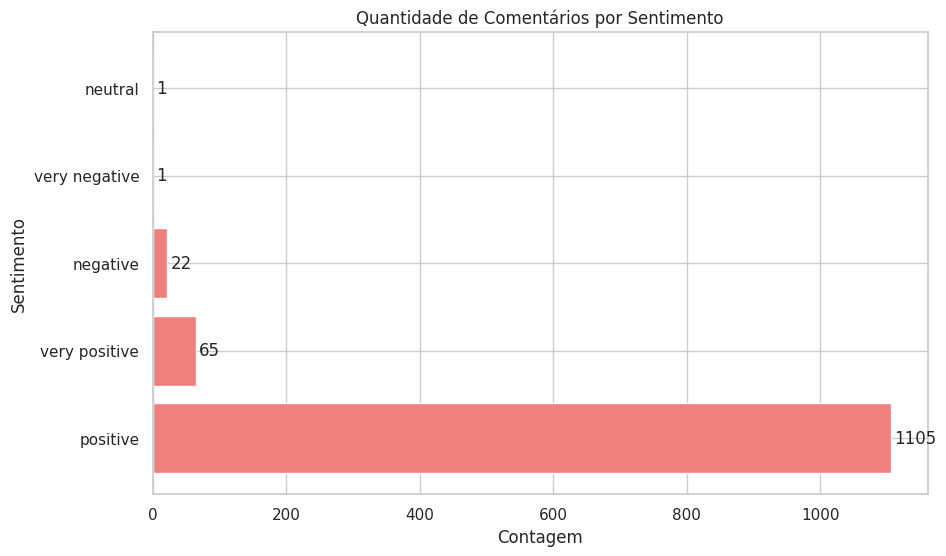

In [99]:
#Resumo_sentimentos
# Gráfico de barras horizontal
plt.figure(figsize=(10, 6))
bars = plt.barh(resumo_sentimentos.index, resumo_sentimentos['Contagem'], color='lightcoral', label='Contagem')

# Adicione rótulos e título
plt.xlabel('Contagem')
plt.ylabel('Sentimento')
plt.title('Quantidade de Comentários por Sentimento')

# Adicione os valores acima das barras
for bar, value in zip(bars, resumo_sentimentos['Contagem']):
    plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height() / 2, str(value), ha='left', va='center')

# Exiba o gráfico
plt.show()

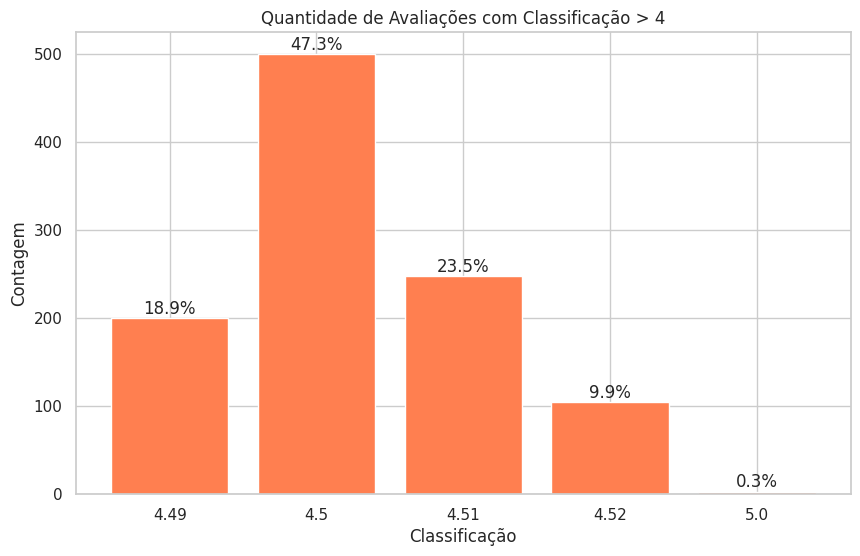

In [139]:
# Filtrar as avaliações maiores que 4
avaliacoes_acima_de_4 = df[df['rating'] > 4]

# Contar o número de avaliações com classificação maior que 4
contagem_avaliacoes = avaliacoes_acima_de_4['rating'].value_counts().sort_index()

# Calcular a porcentagem apenas para os valores que atendem à condição
total = len(avaliacoes_acima_de_4)
valores_percentual = [(count / total) for count in contagem_avaliacoes]

# Crie o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(contagem_avaliacoes.index.astype(str), contagem_avaliacoes.values, color='coral')
plt.xlabel('Classificação')
plt.ylabel('Contagem')
plt.title('Quantidade de Avaliações com Classificação > 4')

# Adicionar os valores percentuais ao gráfico
for i, percentual in enumerate(valores_percentual):
    plt.text(i, contagem_avaliacoes.values[i] + 5, f'{percentual * 100:.1f}%', ha='center')
plt.show()


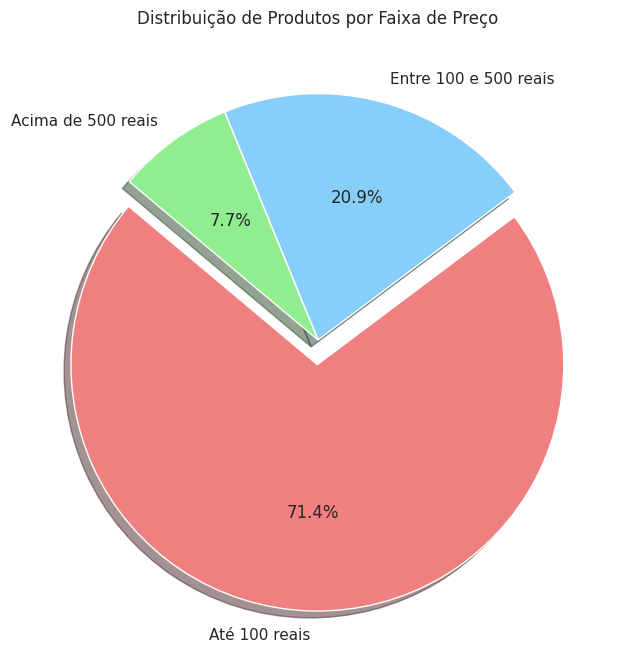

In [84]:
#Faixa de Preço em BLR
# Dados para o gráfico de pizza
labels = resumo_preco.index
quantidade = resumo_preco['Quantidade']

# Cores para as fatias do gráfico
cores = ['lightcoral', 'lightskyblue', 'lightgreen']

# Explodir a primeira fatia
explode = (0.1, 0, 0)

# Crie o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(quantidade, labels=labels, colors=cores, explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Distribuição de Produtos por Faixa de Preço BLR')
plt.show()

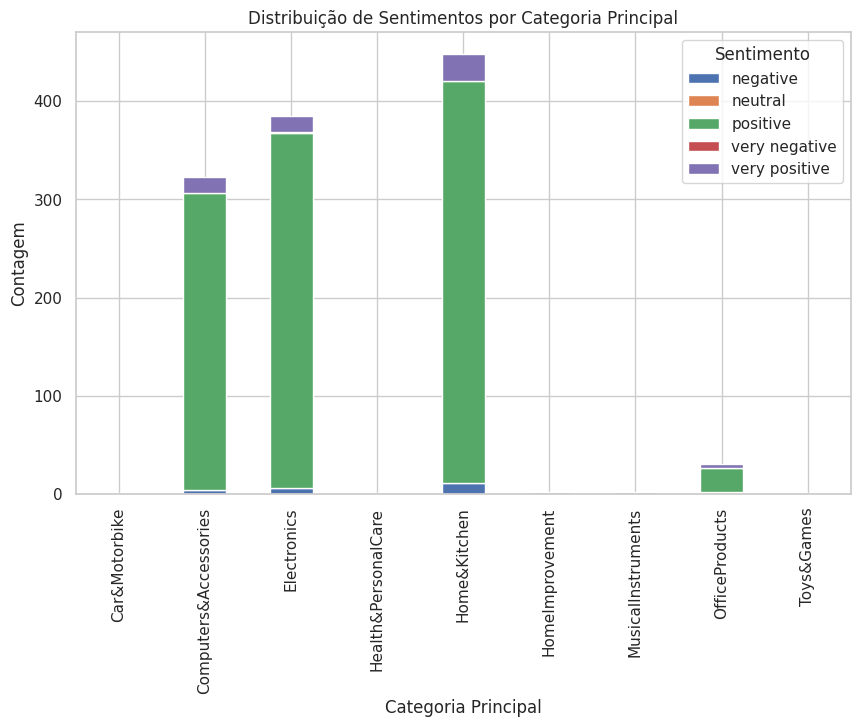

In [126]:
#Distribuição de sentimentos em cada categoria principal.
# Remove a coluna "Total" do DataFrame categoria_sentimento
categoria_sentimento.drop(columns='Total', inplace=True)

# Remove a linha "Total"
categoria_sentimento.drop(index='Total', inplace=True)

# Cria o gráfico sem a coluna "Total"
categoria_sentimento.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Categoria Principal')
plt.ylabel('Contagem')
plt.title('Distribuição de Sentimentos por Categoria Principal')
plt.legend(title='Sentimento')
plt.show()


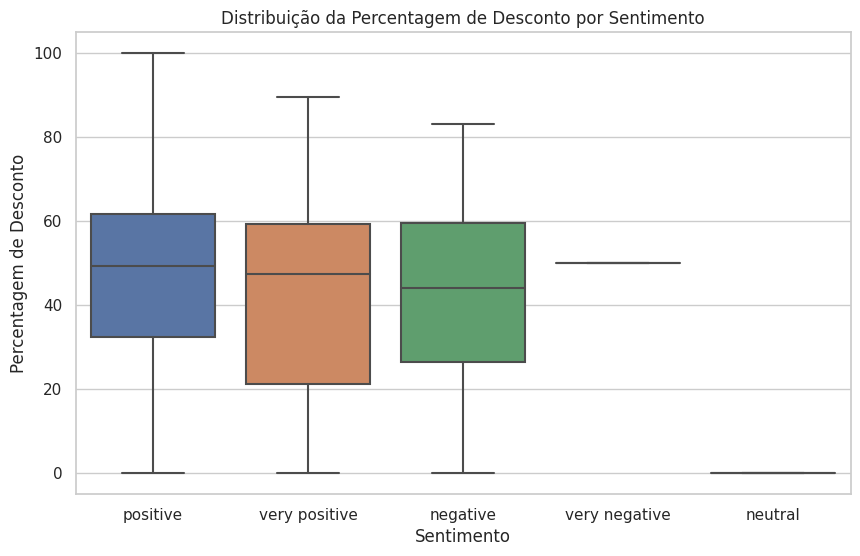

In [91]:
#Gráfico de boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y='percent_discount', data=df)
plt.xlabel('Sentimento')
plt.ylabel('Percentagem de Desconto')
plt.title('Distribuição da Percentagem de Desconto por Sentimento')
plt.show()

In [108]:
!pip show WordCloud

Name: wordcloud
Version: 1.9.2
Summary: A little word cloud generator
Home-page: https://github.com/amueller/word_cloud
Author: Andreas Mueller
Author-email: t3kcit+wordcloud@gmail.com
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: matplotlib, numpy, pillow
Required-by: ydata-profiling


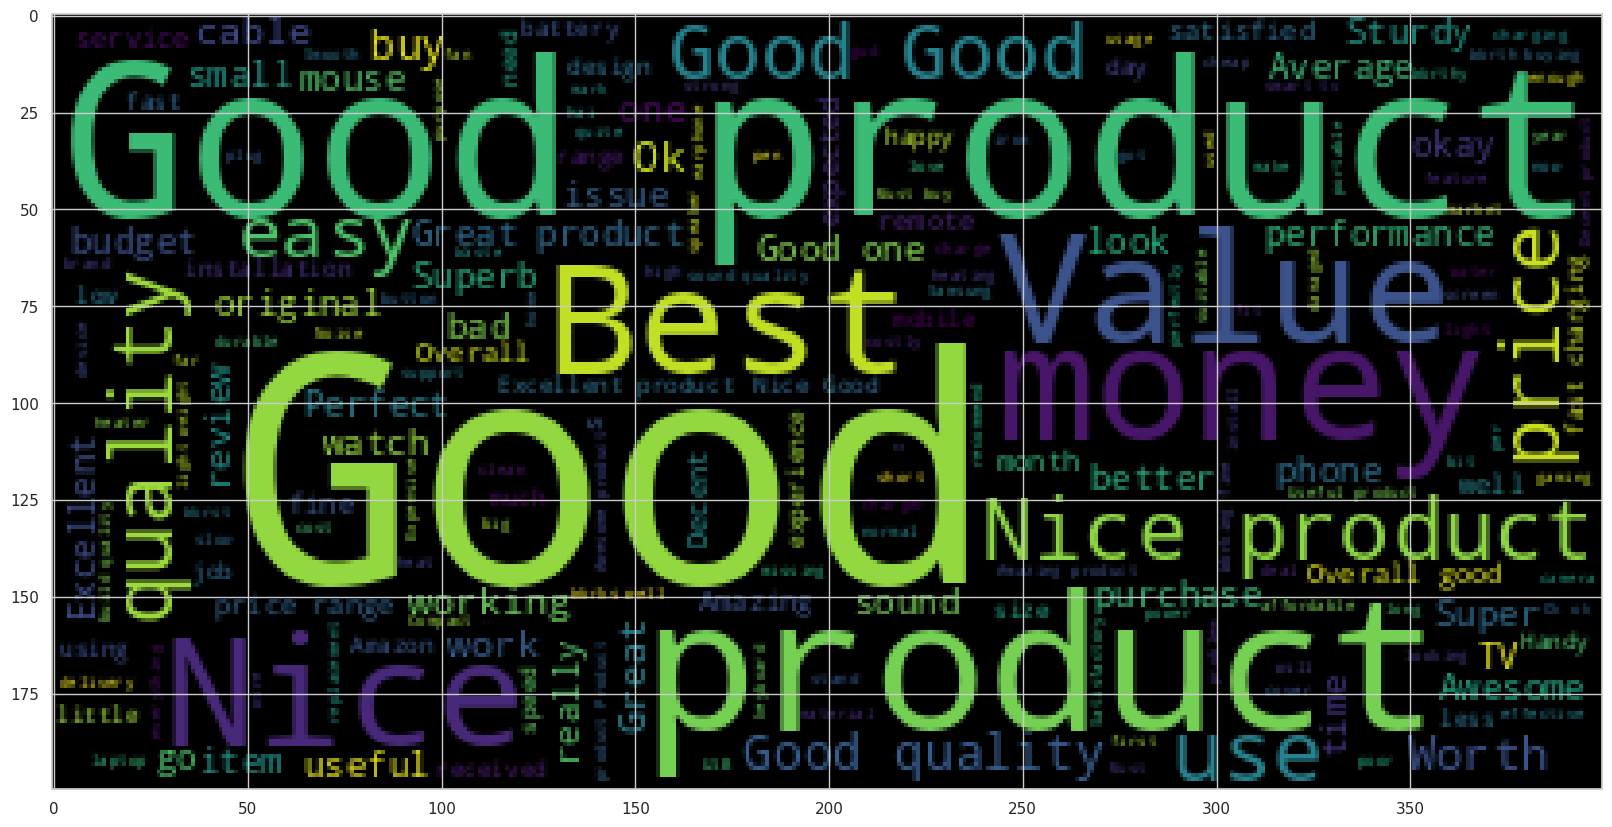

In [127]:
from wordcloud import WordCloud

# Palavras que mais aparecem em review_title
lista = df['review_title'].tolist()
paragrafo = " ".join(lista)
plt.figure(figsize=(20,30))
plt.imshow(WordCloud().generate(paragrafo))

A escala típica de interpretação para coeficientes de correlação de Pearson (que variam de -1 a 1) é a seguinte:

- 1: Correlação positiva perfeita.
- 0,9 a 1: Correlação positiva muito forte.
- 0,7 a 0,9: Correlação positiva forte.
- 0,5 a 0,7: Correlação positiva moderada.
- 0,3 a 0,5: Correlação positiva fraca.
- 0: Ausência de correlação linear.
- -0,3 a -0,5: Correlação negativa fraca.
- -0,5 a -0,7: Correlação negativa moderada.
- -0,7 a -0,9: Correlação negativa forte.
- -0,9 a -1: Correlação negativa muito forte.
- -1: Correlação negativa perfeita.


<ipython-input-168-9d4c9512c937>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


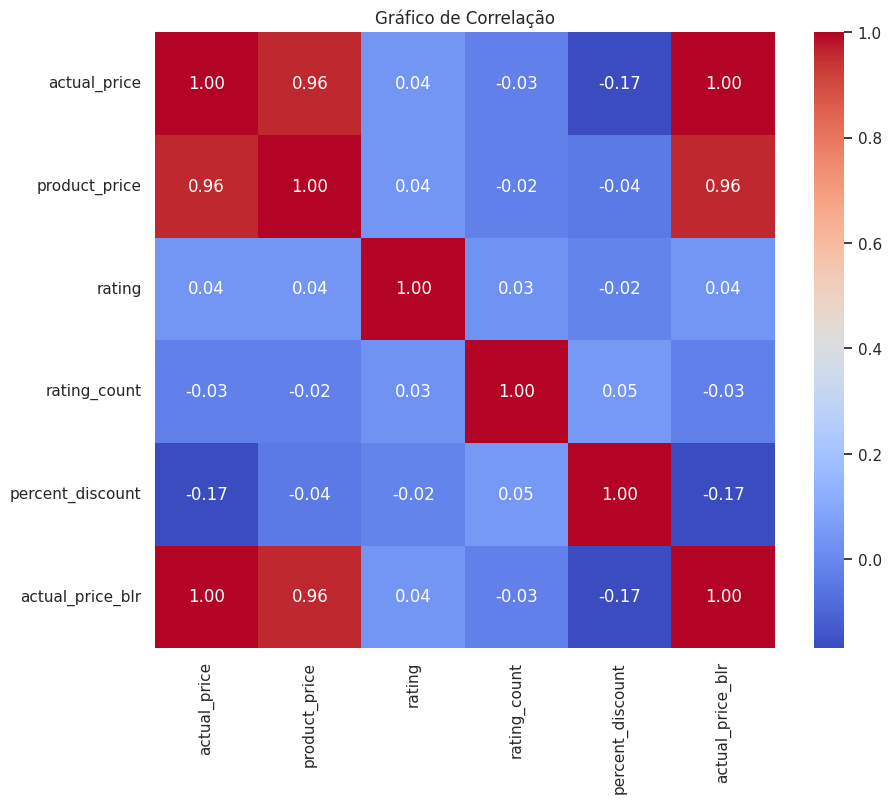

In [168]:
# Calcule a matriz de correlação
correlation_matrix = df.corr()

# Crie o gráfico de correlação (heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Gráfico de Correlação')
plt.show()